###This code will allow you to make batch roi measurements from given image files (.tif) and ROI coordinates (.txt files). The ROI coordinate files are in the format exported by ImageJ's xy_coordinates plugin. The advantages of using this are:
####1)You use a median measurement, which is more flexible for non-normal distribution of measurements. 2) You ignore 0 and nan pixels in your measurement since they can often influence distribution significantly even though they're mostly due to background.

In [24]:
import numpy as np#Essential library of math operations (including numpy arrays, ~ matlab matrices)
from numpy import nan
import matplotlib.pyplot as plt#Essential library for plotting
import tifffile as tif# Importing this with the tifffile.c file results in faster loading (still very fast without it)
import os
#Get list of coordinates from a sample file
from numpy import genfromtxt
from skimage.draw import polygon

%matplotlib inline

In [2]:
files= os.listdir(os.getcwd())#List all files in directory

In [3]:
#Make list of all correct image filenames
images= [i for i in files if i.startswith("cell") and i.endswith(".tif")]# List comprehension to filter image and coord files, woohoo!
coordinates= [i for i in files if i.startswith("cell") and i.endswith(".txt")]

In [4]:
#Ok, now we'll iterate through all the FRET images, use the ROi coordinates to make measurements
#and then move on to the next file
names= []#Initialize list of names of images iterated through
measurements= []#Initialize measurements
for i in range(0,len(images)):#Iterate through list of images from above
    cell_index= 'cell'+str(i+1)#List name of item in list
    print 'Using image file: ', cell_index
    names.append(cell_index)#Add this name to list of completed
    stack= tif.imread(images[i])#Open image
    for j in range(0,len(coordinates)):#Now we'll iterate through available coordinate files for each image
        roi= coordinates[j]#Pulls out NAME of first item in coordinates
        if roi.startswith(cell_index):#Check for coord files. By focusing on cell_index prefix, assure only focuses on file at hand
            print 'Using',roi#If found, mention that you're using it
            my_data = genfromtxt(roi)#Load coordinate file using name of file
            y= my_data[0:,0]#Take x coordinates
            x= my_data[0:,1]#Take y coordinates
            mask= np.zeros(stack.shape, dtype=np.uint8)#Initialize empty mask of same shape as image file
            rr,cc= polygon(x,y)#Find indeces for pixels inside boudary area
            mask[rr,cc]= 1#Using these indeces, fill in mask with 1's at those positions
            #plt.imshow(mask)
            test2= stack
            test3= test2*mask
            test4= np.double(test3)
            test4[test4==0] = nan
            measurements.append(np.nanmedian(test4))
        else:
            print roi, 'Is not part of image: ', cell_index
print 'Median values: ', measurements

Using image file:  cell1
Using cell1_cell1.txt
Using cell1_cell2.txt
Using cell1_cell3.txt
Using cell1_cell4.txt
cell2_cell1.txt Is not part of image:  cell1
cell2_cell2.txt Is not part of image:  cell1
cell2_cell3.txt Is not part of image:  cell1
cell3_cell1.txt Is not part of image:  cell1
cell3_cell2.txt Is not part of image:  cell1
cell4_cell1.txt Is not part of image:  cell1
cell4_cell2.txt Is not part of image:  cell1
Using image file:  cell2
cell1_cell1.txt Is not part of image:  cell2
cell1_cell2.txt Is not part of image:  cell2
cell1_cell3.txt Is not part of image:  cell2
cell1_cell4.txt Is not part of image:  cell2
Using cell2_cell1.txt
Using cell2_cell2.txt
Using cell2_cell3.txt
cell3_cell1.txt Is not part of image:  cell2
cell3_cell2.txt Is not part of image:  cell2
cell4_cell1.txt Is not part of image:  cell2
cell4_cell2.txt Is not part of image:  cell2
Using image file:  cell3
cell1_cell1.txt Is not part of image:  cell3
cell1_cell2.txt Is not part of image:  cell3
cell1_

Median measurements:  [39.0, 39.0, 39.0, 39.0, 40.0, 39.0, 39.0, 40.0, 44.0, 37.0, 41.0]


(array([ 1.,  0.,  6.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 37. ,  37.7,  38.4,  39.1,  39.8,  40.5,  41.2,  41.9,  42.6,
         43.3,  44. ]),
 <a list of 10 Patch objects>)

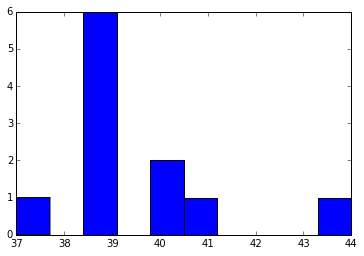

In [8]:
print 'Median measurements: ', measurements
plt.hist(measurements)#Histogram of all measurements

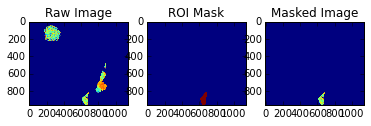

In [23]:
#Plotting three figures to make sure measurements were performed on correct ROI (should be last .txt file)
plt.subplot(1,3,1)
plt.imshow(stack, vmin= 0, vmax= 75)

plt.title('Raw Image ')


plt.subplot(1,3,2)
plt.imshow(mask)
plt.title('ROI Mask')

plt.subplot(1,3,3)
plt.imshow(test3, vmin= 0, vmax= 75)
plt.title('Masked Image')